## Eleições 2024 - boletins de urna

#### Notebook para analisar rapidamente os dados disponibilizados pelo TSE das eleições de 2024

Portal de Dados Abertos do TSE: https://dadosabertos.tse.jus.br/

Carlos H. Grohmann - IAG-USP

In [1]:
# rodar para deixar as células da largura da janela do navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
# imports
import sys,os
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as clrs
from scipy.spatial import ConvexHull

sep = ';' # separador do arquivo CSV
dec = ',' # separador de decimais
enc = 'latin1' # codificação dos caracteres

### Leitura de Boletins de Urna turno 1

In [2]:
# arquivos CSV
f = '/home/guano/Desktop/bweb_1t_SP_091020241636.csv'
df_bu = pd.read_csv(f, sep=sep, encoding=enc, decimal=dec)

In [3]:
len(df_bu)

9429859

In [4]:
df_bu.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_SECOES_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEI_BIOM_SEM_HABILITACAO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71455,SOROCABA,342,206,1139,13,Vereador,13,PT,Partido dos Trabalhadores,2024-10-06 18:42:43,394,287,107,1,Apurada,1,Nominal,13510,FRANCISCO FRANÇA,3,2386931,758.952.596.180.270.145.,203.224,EBD5372C,2024-09-28 14:22:00,13 - 206,#NULO#,2024-10-06 08:00:01,2024-10-06 17:02:50,10,2024-10-06 17:05:01,-1,-1
1,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,70572,SANTO ANDRÉ,156,101,1996,13,Vereador,70,AVANTE,AVANTE,2024-10-06 18:54:29,267,193,74,1,Apurada,1,Nominal,70030,DANDAN,1,2099917,980.508.183.311.230.032.,616.047,2E92749A,2024-09-26 16:58:00,13 - 101,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:40,13,2024-10-06 17:04:55,-1,-1
2,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,64254,FRANCA,291,355,2054,13,Vereador,11,PP,PROGRESSISTAS,2024-10-06 19:23:36,398,283,115,1,Apurada,1,Nominal,11234,MARCO GARCIA,4,2303330,162.308.333.613.198.442.,901.429,80D07511,2024-09-29 08:14:00,13 - 355,#NULO#,2024-10-06 08:00:01,2024-10-06 17:03:58,5,2024-10-06 17:07:10,-1,-1
3,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,66710,MAIRIPORÃ,237,76,1147,13,Vereador,18,REDE,Rede Sustentabilidade,2024-10-06 18:28:47,268,220,48,1,Apurada,1,Nominal,18888,DORI,4,2363551,856.501.001.624.154.177.,649.217,991ADEAD,2024-09-24 14:24:00,13 - 76,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:57,9,2024-10-06 17:04:46,-1,-1
4,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,63010,CÂNDIDO MOTA,226,39,1104,13,Vereador,10,REPUBLICANOS,REPUBLICANOS,2024-10-06 17:52:57,326,264,62,1,Apurada,1,Nominal,10125,VALDIR CORINHO,1,1796946,939.791.136.552.194.992.,029.711,DBF1AD11,2024-09-27 12:14:00,13 - 39,#NULO#,2024-10-06 08:00:01,2024-10-06 17:00:44,17,2024-10-06 17:02:05,-1,-1


In [5]:
cols = list(df_bu.columns)

In [6]:
df_bu.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_SECOES_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEI_BIOM_SEM_HABILITACAO', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

### Apenas Município de São Paulo

In [7]:
list(df_bu['NM_MUNICIPIO'].unique())

['SOROCABA',
 'SANTO ANDRÉ',
 'FRANCA',
 'MAIRIPORÃ',
 'CÂNDIDO MOTA',
 'SUZANO',
 'SÃO PAULO',
 'OSASCO',
 'RIBEIRÃO PRETO',
 'SÃO CARLOS',
 'ITU',
 'COTIA',
 'PRADÓPOLIS',
 'MAUÁ',
 'SETE BARRAS',
 'GUARULHOS',
 'BARUERI',
 'CUBATÃO',
 'SÃO CAETANO DO SUL',
 'JOSÉ BONIFÁCIO',
 'SANTOS',
 'MONTE MOR',
 'ITAPETININGA',
 'VINHEDO',
 'EMBU DAS ARTES',
 'BRODOWSKI',
 'MONGAGUÁ',
 'OURINHOS',
 'RIBEIRÃO PIRES',
 'PERUÍBE',
 'JALES',
 'CONCHAL',
 'VOTORANTIM',
 'PRESIDENTE PRUDENTE',
 'AMERICANA',
 'PRAIA GRANDE',
 'JAÚ',
 'OLÍMPIA',
 'IBIÚNA',
 'PEDREGULHO',
 'SÃO BERNARDO DO CAMPO',
 'JUNDIAÍ',
 'RIO CLARO',
 'SÃO JOÃO DA BOA VISTA',
 'PIEDADE',
 'PORTO FELIZ',
 'PILAR DO SUL',
 'ITANHAÉM',
 'CONCHAS',
 'SERTÃOZINHO',
 'TORRE DE PEDRA',
 'PARAGUAÇU PAULISTA',
 'CAPIVARI',
 'ITAPIRA',
 'MONTE ALTO',
 'ARARAQUARA',
 'PORTO FERREIRA',
 'MOGI GUAÇU',
 'ITAÍ',
 'ITATIBA',
 'SÃO VICENTE',
 'BRAGANÇA PAULISTA',
 'CABREÚVA',
 'ARAÇATUBA',
 'CARAPICUÍBA',
 'ITAQUAQUECETUBA',
 'BARRETOS',
 'NOVA EU

In [8]:
mun = 'SÃO PAULO'
df_bu_sp = df_bu[df_bu['NM_MUNICIPIO'] == mun].copy()
len(df_bu_sp)

2671432

In [9]:
df_bu_sp.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_SECOES_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEI_BIOM_SEM_HABILITACAO,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
7,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71072,SÃO PAULO,259,39,1031,13,Vereador,10,REPUBLICANOS,REPUBLICANOS,2024-10-06 18:33:19,391,265,126,1,Apurada,1,Nominal,10550,SIBELI NICOLA,1,2277695,432.495.630.196.904.401.,517.123,4CFFD8CE,2024-09-28 12:07:00,13 - 39,#NULO#,2024-10-06 08:00:01,2024-10-06 17:01:52,30,2024-10-06 17:03:37,-1,-1
25,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71072,SÃO PAULO,372,685,2054,13,Vereador,22,PL,Partido Liberal,2024-10-06 19:05:19,392,262,130,1,Apurada,1,Nominal,22200,GILBERTO NASCIMENTO,2,2009753,068.704.713.657.078.946.,370.279,BAFCAC12,2024-09-25 14:59:00,13 - 685,#NULO#,2024-10-06 08:00:01,2024-10-06 17:05:21,16,2024-10-06 17:05:56,-1,-1
26,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71072,SÃO PAULO,280,126,1112,13,Vereador,22,PL,Partido Liberal,2024-10-06 19:05:35,330,260,70,1,Apurada,1,Nominal,22200,GILBERTO NASCIMENTO,2,1826794,765.750.650.173.897.088.,596.902,4BA8E88E,2024-09-28 16:45:00,13 - 126,#NULO#,2024-10-06 08:00:01,2024-10-06 17:06:45,32,2024-10-06 17:08:25,-1,-1
27,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71072,SÃO PAULO,4,324,1163,13,Vereador,22,PL,Partido Liberal,2024-10-06 19:08:43,373,277,96,1,Apurada,1,Nominal,22200,GILBERTO NASCIMENTO,3,1810301,149.558.992.053.458.560.,696.085,C2BA58F4,2024-09-26 12:16:00,13 - 324,#NULO#,2024-10-06 08:00:01,2024-10-06 17:06:42,16,2024-10-06 17:08:26,-1,-1
28,09/10/2024,16:36:29,2024,0,Eleição Ordinária,452,2024-10-06 00:00:00,1,619,Eleições Municipais 2024,SP,71072,SÃO PAULO,3,157,1201,13,Vereador,22,PL,Partido Liberal,2024-10-06 19:06:28,329,205,124,1,Apurada,1,Nominal,22200,GILBERTO NASCIMENTO,1,1786639,129.345.336.879.693.985.,461.750,92533CED,2024-09-29 13:23:00,13 - 157,#NULO#,2024-10-06 08:00:01,2024-10-06 17:05:06,19,2024-10-06 17:07:01,-1,-1


### Apenas Prefeito

In [10]:
list(df_bu_sp['DS_CARGO_PERGUNTA'].unique())

['Vereador', 'Prefeito']

In [11]:
cargo = 'Prefeito'
df_bu_sp_pref = df_bu_sp[df_bu_sp['DS_CARGO_PERGUNTA'] == cargo].copy()
len(df_bu_sp_pref)

218041

### Pivô da tabela

In [12]:
# fazer pivot por numero da seção não funciona, pois tem o mesmo número nas outras zonas
pd.pivot_table(df_bu_sp_pref, index=['NR_SECAO'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc='min', fill_value=0)

NM_VOTAVEL,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
NR_SECAO,,,,,,,,,,,,
1,1,1,2,1,38,2,1,2,33,39,1,12
2,1,1,1,1,34,0,1,4,29,40,1,12
3,1,1,1,1,37,0,1,1,31,49,1,10
4,1,2,1,1,26,1,1,1,30,44,1,9
5,1,1,1,1,31,0,1,4,32,44,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0,0,14,3,47,0,0,10,36,33,1,15
1054,0,0,12,2,47,0,2,10,38,23,1,12
1055,0,0,4,0,14,0,1,9,15,9,0,1


In [13]:
# coluna com junção de zona e seção
df_bu_sp_pref['zonasec'] = df_bu_sp_pref['NR_ZONA'].map(str) +'_'+ df_bu_sp_pref['NR_SECAO'].map(str)

In [14]:
df_bu_sp_pref['zonasec'].unique()

array(['247_37', '1_158', '254_366', ..., '248_887', '381_722', '4_439'],
      dtype=object)

In [15]:
df_bu_sp_pref_pvt = pd.pivot_table(df_bu_sp_pref, index=['zonasec','NR_ZONA'], values='QT_VOTOS', columns=['NM_VOTAVEL'], aggfunc='min', fill_value=0).reset_index()
df_bu_sp_pref_pvt

NM_VOTAVEL,zonasec,NR_ZONA,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
0,1_1,1,0,0,7,2,89,0,7,6,55,85,0,43
1,1_10,1,0,0,3,3,91,0,2,4,34,53,0,29
2,1_100,1,0,0,4,2,64,0,2,9,39,49,0,30
3,1_101,1,0,0,4,3,55,0,4,7,48,52,0,27
4,1_102,1,0,0,5,6,80,0,1,11,40,46,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26508,6_95,6,0,0,1,2,78,0,6,10,54,61,0,55
26509,6_96,6,0,0,5,1,67,0,12,10,65,77,0,43
26510,6_97,6,0,0,4,2,80,0,4,8,51,82,1,24
26511,6_98,6,0,0,6,1,75,0,5,5,48,62,0,31


In [17]:
df_bu_sp_pref_pvt.sum()

NM_VOTAVEL
zonasec             1_11_101_1001_1011_1021_1031_1041_1051_1061_10...
NR_ZONA                                                       7962210
ALTINO PRAZERES                                                  3017
BEBETO HADDAD                                                     833
Branco                                                         241734
DATENA                                                         112344
GUILHERME BOULOS                                              1776127
JOÃO PIMENTA                                                      960
MARINA HELENA                                                   84212
Nulo                                                           422802
PABLO MARÇAL                                                  1719274
RICARDO NUNES                                                 1801139
RICARDO SENESE                                                   5593
TABATA AMARAL                                                  605552
dtype: ob

In [18]:
df_bu_sp_pref_pvt.groupby('NR_ZONA').sum()

NM_VOTAVEL,zonasec,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
NR_ZONA,,,,,,,,,,,,,
1,1_11_101_1001_1011_1021_1031_1041_1051_1061_10...,78,28,2141,1351,40306,32,1276,3566,18193,20986,124,9973
2,2_12_102_112_122_132_1362_1372_1382_1392_142_1...,79,20,1545,866,37387,16,2222,2869,20642,28994,121,14376
3,3_13_103_1003_1013_1023_1033_1043_1053_1063_10...,61,16,2653,1481,29701,21,1285,4520,23934,24453,138,8517
4,4_14_104_1004_1014_1024_1034_1044_1054_1064_10...,42,12,2197,1271,20922,20,1683,4526,30053,27744,102,9372
5,5_15_105_1005_1015_1025_1035_1045_1055_1065_10...,25,8,1098,481,19831,19,2420,1897,16642,26854,49,12788
6,6_16_106_1006_1016_1026_1036_1046_1056_1066_10...,74,16,2251,1281,33840,29,2589,4064,25526,31577,135,15694
20,20_120_1020_10020_10120_10220_10320_10420_1052...,51,12,5527,2363,41209,13,978,8638,28805,26435,56,9859
246,246_1246_10246_100246_101246_102246_103246_104...,47,10,2195,1172,23987,17,2583,4259,28571,37459,79,13000
247,247_1247_10247_11247_117247_118247_119247_1202...,39,19,5245,2481,30106,13,1218,9028,33154,30469,75,8873


In [19]:
# 1 - retirar 'zonasec' - df_bu_sp_pref_pvt.drop(columns='zonasec')
# 2 - agrupar por zona e somar - .groupby('NR_ZONA').sum()
# 3 - resetar o index para ter 'NR_ZONA' como coluna de novo - .reset_index()
df_bu_sp_pref_pvt_sumsec = df_bu_sp_pref_pvt.drop(columns='zonasec').groupby('NR_ZONA').sum().reset_index()

In [183]:
df_bu_sp_pref_pvt_sumsec

NM_VOTAVEL,NR_ZONA,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
0,1,78,28,2141,1351,40306,32,1276,3566,18193,20986,124,9973
1,2,79,20,1545,866,37387,16,2222,2869,20642,28994,121,14376
2,3,61,16,2653,1481,29701,21,1285,4520,23934,24453,138,8517
3,4,42,12,2197,1271,20922,20,1683,4526,30053,27744,102,9372
4,5,25,8,1098,481,19831,19,2420,1897,16642,26854,49,12788
5,6,74,16,2251,1281,33840,29,2589,4064,25526,31577,135,15694
6,20,51,12,5527,2363,41209,13,978,8638,28805,26435,56,9859
7,246,47,10,2195,1172,23987,17,2583,4259,28571,37459,79,13000
8,247,39,19,5245,2481,30106,13,1218,9028,33154,30469,75,8873
9,248,50,13,5104,2453,30732,18,1106,9229,31778,28643,136,9085


In [20]:
df_bu_sp_pref_pvt_sumsec.columns

Index(['NR_ZONA', 'ALTINO PRAZERES', 'BEBETO HADDAD', 'Branco', 'DATENA',
       'GUILHERME BOULOS', 'JOÃO PIMENTA', 'MARINA HELENA', 'Nulo',
       'PABLO MARÇAL', 'RICARDO NUNES', 'RICARDO SENESE', 'TABATA AMARAL'],
      dtype='object', name='NM_VOTAVEL')

### Zonas Eleitorais

In [21]:
zonas = list(df_bu_sp_pref_pvt_sumsec['NR_ZONA'].unique())
np.sort(zonas)

array([  1,   2,   3,   4,   5,   6,  20, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 280, 320, 325, 326,
       327, 328, 346, 347, 348, 349, 350, 351, 352, 353, 371, 372, 373,
       374, 375, 376, 381, 389, 390, 392, 397, 403, 404, 405, 408, 413,
       417, 418, 420, 421, 422])

In [22]:
len(zonas)

57

### Mapa de Zonas Eleitorais

In [23]:
# geopackage
gpkg_zonas = './sig_shps/zonas_sp.gpkg'
gdf_zonas = gpd.read_file(gpkg_zonas)

In [24]:
gdf_zonas

,OBJECTID,ZEFINAL,FIRST_sede,FIRST_NOME,Shape_Leng,Shape_Area,geometry
0,1,1,SÃO PAULO,SÃO PAULO - BELA VISTA,0.151061,0.000689,"MULTIPOLYGON (((-46.64307 -23.54078, -46.6389 ..."
1,2,2,SÃO PAULO,SÃO PAULO - PERDIZES,0.173500,0.001448,"MULTIPOLYGON (((-46.64825 -23.5274, -46.6482 -..."
2,3,3,SÃO PAULO,SÃO PAULO - SANTA IFIGÊNIA,0.190205,0.001158,"MULTIPOLYGON (((-46.62529 -23.51927, -46.62284..."
3,4,4,SÃO PAULO,SÃO PAULO - MOÓCA,0.280817,0.001738,"MULTIPOLYGON (((-46.59404 -23.52962, -46.5923 ..."
4,5,5,SÃO PAULO,SÃO PAULO - JARDIM PAULISTA,0.176376,0.001022,"MULTIPOLYGON (((-46.66587 -23.59564, -46.66616..."
...,...,...,...,...,...,...,...
388,389,422,SÃO PAULO,SÃO PAULO - LAUZANE PAULISTA,0.256148,0.001764,"MULTIPOLYGON (((-46.6562 -23.43099, -46.65601 ..."
389,390,423,CAMPINAS,CAMPINAS,0.846879,0.017129,"MULTIPOLYGON (((-46.89799 -22.79371, -46.89774..."
390,391,424,JUNDIAÍ,JUNDIAÍ,0.553097,0.009025,"MULTIPOLYGON (((-46.85676 -23.0829, -46.85618 ..."
391,392,426,DIADEMA,DIADEMA,0.180748,0.000917,"MULTIPOLYGON (((-46.60247 -23.70424, -46.60338..."


<Axes: >

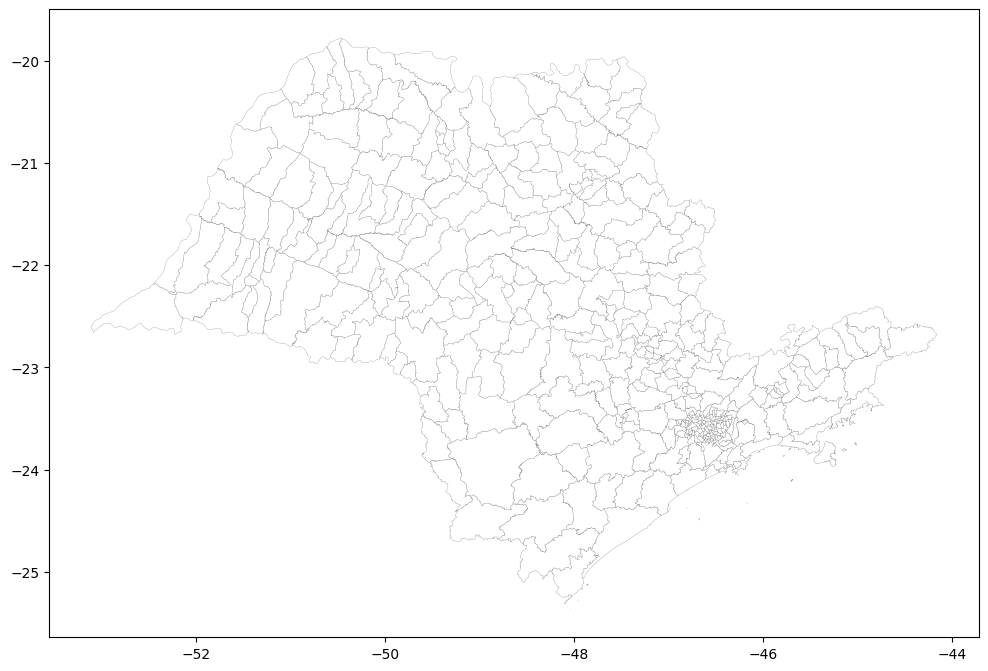

In [25]:
gdf_zonas.plot(figsize=(12,12), color='white', edgecolor='grey', linewidth=0.2)

In [26]:
gdf_zonas.columns

Index(['OBJECTID', 'ZEFINAL', 'FIRST_sede', 'FIRST_NOME', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [27]:
list(gdf_zonas['FIRST_sede'].unique())

['SÃO PAULO',
 'AGUDOS',
 'AMPARO',
 'ANDRADINA',
 'APIAÍ',
 'ARAÇATUBA',
 'PARAGUAÇU PAULISTA',
 'ARARAQUARA',
 'ARARAS',
 'ASSIS',
 'ATIBAIA',
 'AVARÉ',
 'BANANAL',
 'BARIRI',
 'BARRETOS',
 'BATATAIS',
 'BAURU',
 'BEBEDOURO',
 'BIRIGUI',
 'BOTUCATU',
 'BRAGANÇA PAULISTA',
 'BROTAS',
 'CAÇAPAVA',
 'CACONDE',
 'CAFELÂNDIA',
 'CAJURU',
 'CAMPINAS',
 'VALINHOS',
 'CAMPOS DO JORDÃO',
 'CANANÉIA',
 'CAPÃO BONITO',
 'CAPIVARI',
 'CASA BRANCA',
 'CATANDUVA',
 'CONCHAS',
 'CRUZEIRO',
 'CUNHA',
 'DESCALVADO',
 'FRANCA',
 'GARÇA',
 'GUARATINGUETÁ',
 'IBITINGA',
 'IGARAPAVA',
 'IGUAPE',
 'ITAPETININGA',
 'ITAPEVA',
 'ITAPIRA',
 'ITÁPOLIS',
 'ITAPORANGA',
 'ITARARÉ',
 'ITATIBA',
 'ITU',
 'ITUVERAVA',
 'JABOTICABAL',
 'JACAREÍ',
 'JAÚ',
 'JOSÉ BONIFÁCIO',
 'JUNDIAÍ',
 'LIMEIRA',
 'LINS',
 'LORENA',
 'LUCÉLIA',
 'MARÍLIA',
 'MARTINÓPOLIS',
 'MIRASSOL',
 'MOCOCA',
 'MOGI DAS CRUZES',
 'MOGI MIRIM',
 'MONTE ALTO',
 'MONTE APRAZÍVEL',
 'NOVA GRANADA',
 'NOVO HORIZONTE',
 'OLÍMPIA',
 'ORLÂNDIA',
 'OURI

In [28]:
gdf_zonas_sp = gdf_zonas[gdf_zonas['FIRST_sede']=='SÃO PAULO']
gdf_zonas_sp.head()

,OBJECTID,ZEFINAL,FIRST_sede,FIRST_NOME,Shape_Leng,Shape_Area,geometry
0,1,1,SÃO PAULO,SÃO PAULO - BELA VISTA,0.151061,0.000689,"MULTIPOLYGON (((-46.64307 -23.54078, -46.6389 ..."
1,2,2,SÃO PAULO,SÃO PAULO - PERDIZES,0.173500,0.001448,"MULTIPOLYGON (((-46.64825 -23.5274, -46.6482 -..."
2,3,3,SÃO PAULO,SÃO PAULO - SANTA IFIGÊNIA,0.190205,0.001158,"MULTIPOLYGON (((-46.62529 -23.51927, -46.62284..."
3,4,4,SÃO PAULO,SÃO PAULO - MOÓCA,0.280817,0.001738,"MULTIPOLYGON (((-46.59404 -23.52962, -46.5923 ..."
4,5,5,SÃO PAULO,SÃO PAULO - JARDIM PAULISTA,0.176376,0.001022,"MULTIPOLYGON (((-46.66587 -23.59564, -46.66616..."


In [29]:
len(gdf_zonas_sp)

58

In [30]:
zonas_mapa = list(gdf_zonas_sp['ZEFINAL'].unique())
np.sort(zonas_mapa)

array([  1,   2,   3,   4,   5,   6,  20, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 280, 320, 325, 326,
       327, 328, 346, 347, 348, 349, 350, 351, 352, 353, 371, 372, 373,
       374, 375, 376, 381, 389, 390, 392, 397, 398, 403, 404, 405, 408,
       413, 417, 418, 420, 421, 422], dtype=int32)

In [31]:
np.sort(zonas) # do arquivo de boletim de urna
# aqui não tem a zona 398

array([  1,   2,   3,   4,   5,   6,  20, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 280, 320, 325, 326,
       327, 328, 346, 347, 348, 349, 350, 351, 352, 353, 371, 372, 373,
       374, 375, 376, 381, 389, 390, 392, 397, 403, 404, 405, 408, 413,
       417, 418, 420, 421, 422])

<Axes: >

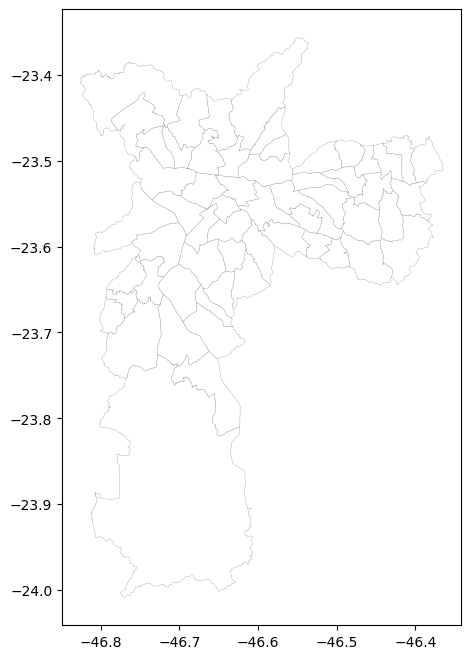

In [32]:
gdf_zonas_sp.plot(figsize=(6,8), color='white', edgecolor='grey', linewidth=0.2)

#### Junção dos dataframes

In [33]:
df_bu_sp_pref_pvt_sumsec.columns

Index(['NR_ZONA', 'ALTINO PRAZERES', 'BEBETO HADDAD', 'Branco', 'DATENA',
       'GUILHERME BOULOS', 'JOÃO PIMENTA', 'MARINA HELENA', 'Nulo',
       'PABLO MARÇAL', 'RICARDO NUNES', 'RICARDO SENESE', 'TABATA AMARAL'],
      dtype='object', name='NM_VOTAVEL')

In [34]:
gdf_zonas_sp.columns

Index(['OBJECTID', 'ZEFINAL', 'FIRST_sede', 'FIRST_NOME', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [35]:
# renomear coluna para merge
gdf_zonas_sp = gdf_zonas_sp.rename(columns={"ZEFINAL": "NR_ZONA"})
gdf_zonas_sp.head()

,OBJECTID,NR_ZONA,FIRST_sede,FIRST_NOME,Shape_Leng,Shape_Area,geometry
0,1,1,SÃO PAULO,SÃO PAULO - BELA VISTA,0.151061,0.000689,"MULTIPOLYGON (((-46.64307 -23.54078, -46.6389 ..."
1,2,2,SÃO PAULO,SÃO PAULO - PERDIZES,0.173500,0.001448,"MULTIPOLYGON (((-46.64825 -23.5274, -46.6482 -..."
2,3,3,SÃO PAULO,SÃO PAULO - SANTA IFIGÊNIA,0.190205,0.001158,"MULTIPOLYGON (((-46.62529 -23.51927, -46.62284..."
3,4,4,SÃO PAULO,SÃO PAULO - MOÓCA,0.280817,0.001738,"MULTIPOLYGON (((-46.59404 -23.52962, -46.5923 ..."
4,5,5,SÃO PAULO,SÃO PAULO - JARDIM PAULISTA,0.176376,0.001022,"MULTIPOLYGON (((-46.66587 -23.59564, -46.66616..."


In [36]:
gdf_merge = gdf_zonas_sp.merge(df_bu_sp_pref_pvt_sumsec, on='NR_ZONA')
gdf_merge.head()

,OBJECTID,NR_ZONA,FIRST_sede,FIRST_NOME,Shape_Leng,Shape_Area,geometry,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
0,1,1,SÃO PAULO,SÃO PAULO - BELA VISTA,0.151061,0.000689,"MULTIPOLYGON (((-46.64307 -23.54078, -46.6389 ...",78,28,2141,1351,40306,32,1276,3566,18193,20986,124,9973
1,2,2,SÃO PAULO,SÃO PAULO - PERDIZES,0.173500,0.001448,"MULTIPOLYGON (((-46.64825 -23.5274, -46.6482 -...",79,20,1545,866,37387,16,2222,2869,20642,28994,121,14376
2,3,3,SÃO PAULO,SÃO PAULO - SANTA IFIGÊNIA,0.190205,0.001158,"MULTIPOLYGON (((-46.62529 -23.51927, -46.62284...",61,16,2653,1481,29701,21,1285,4520,23934,24453,138,8517
3,4,4,SÃO PAULO,SÃO PAULO - MOÓCA,0.280817,0.001738,"MULTIPOLYGON (((-46.59404 -23.52962, -46.5923 ...",42,12,2197,1271,20922,20,1683,4526,30053,27744,102,9372
4,5,5,SÃO PAULO,SÃO PAULO - JARDIM PAULISTA,0.176376,0.001022,"MULTIPOLYGON (((-46.66587 -23.59564, -46.66616...",25,8,1098,481,19831,19,2420,1897,16642,26854,49,12788


### Candidatos

In [37]:
# candidatos
gb = 'GUILHERME BOULOS'
pm = 'PABLO MARÇAL'
rn = 'RICARDO NUNES'
ta = 'TABATA AMARAL'

### Plots

<Axes: >

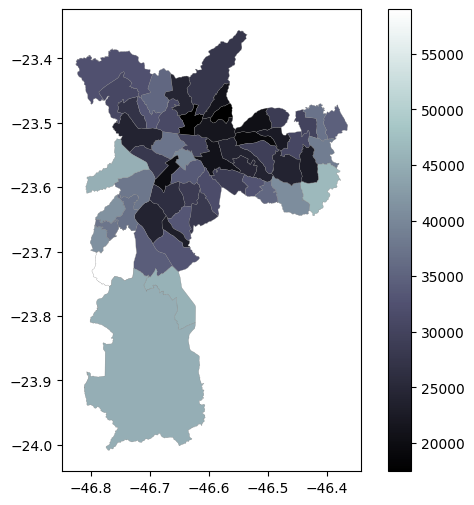

In [38]:
gdf_merge.plot(column=gb, figsize=(7,6), legend=True, cmap='bone', edgecolor='grey', linewidth=0.2)

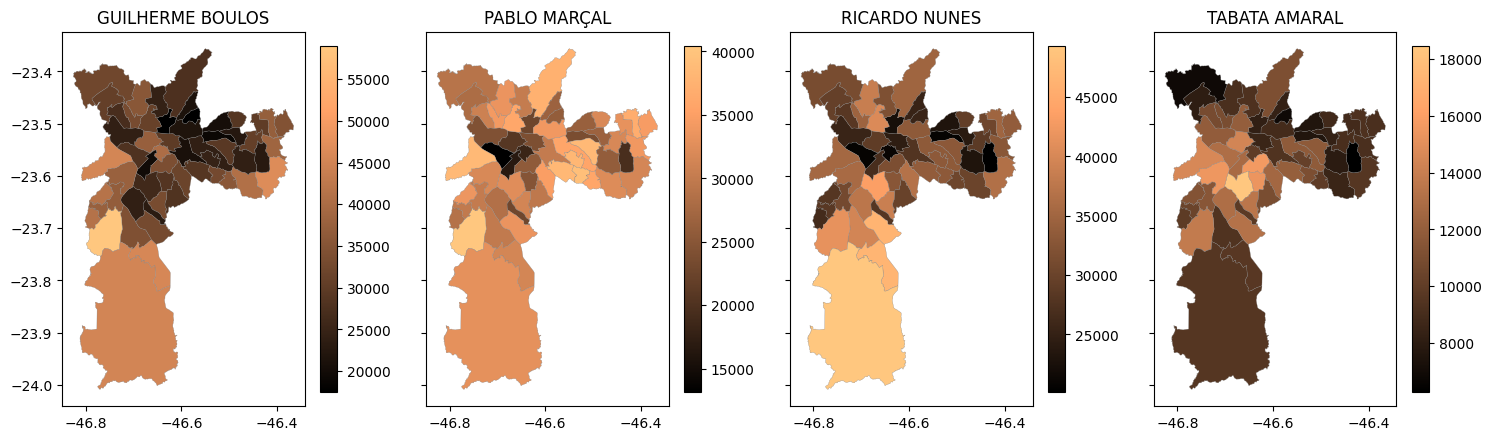

In [39]:
votaveis = [gb, pm, rn, ta]

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18,15))

for i in range(4):
    ax = axs[i]
    vot = votaveis[i]
    # gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.2)
    gdf_merge.plot(ax=ax, column=vot, figsize=(7,6), legend=True, cmap='copper', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})
    ax.set_title(vot)

### Três candidatos mais bem colocados

(0.0, 60000.0)

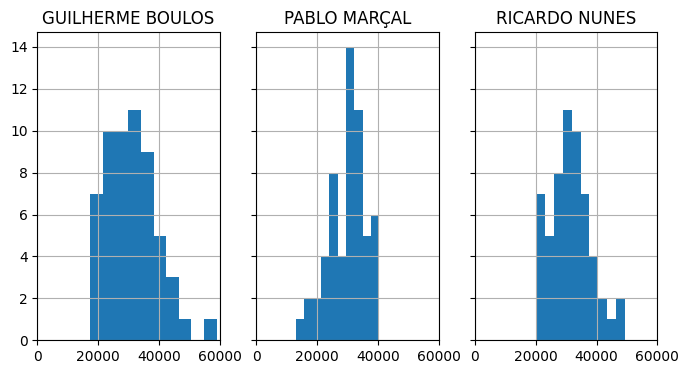

In [44]:
# histograms

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(8,4))

ax = axs[0]
vot = gb
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,60000))

ax = axs[1]
vot = pm
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,60000))

ax = axs[2]
vot = rn
gdf_merge[vot].hist(ax=ax)
ax.set_title(vot)
ax.set_xlim((0,60000))

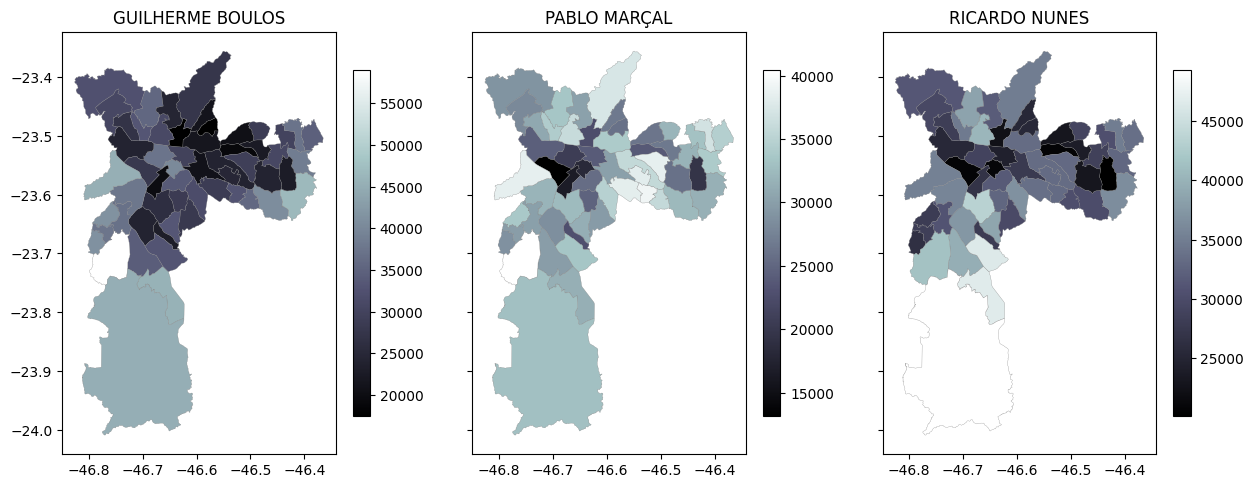

In [42]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15,15))
norm = clrs.CenteredNorm(vcenter=50, halfrange=50)

ax = axs[0]
vot = gb
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='bone', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot)

ax = axs[1]
vot = pm
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='bone', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot);

ax = axs[2]
vot = rn
gdf_merge.plot(ax=ax, column=vot, legend=True, cmap='bone', edgecolor='grey', linewidth=0.2, legend_kwds={'shrink':0.3})#, norm=norm)
ax.set_title(vot);


### grafico todas as urnas

In [47]:
# df pivô
df_bu_sp_pref_pvt

NM_VOTAVEL,zonasec,NR_ZONA,ALTINO PRAZERES,BEBETO HADDAD,Branco,DATENA,GUILHERME BOULOS,JOÃO PIMENTA,MARINA HELENA,Nulo,PABLO MARÇAL,RICARDO NUNES,RICARDO SENESE,TABATA AMARAL
0,1_1,1,0,0,7,2,89,0,7,6,55,85,0,43
1,1_10,1,0,0,3,3,91,0,2,4,34,53,0,29
2,1_100,1,0,0,4,2,64,0,2,9,39,49,0,30
3,1_101,1,0,0,4,3,55,0,4,7,48,52,0,27
4,1_102,1,0,0,5,6,80,0,1,11,40,46,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26508,6_95,6,0,0,1,2,78,0,6,10,54,61,0,55
26509,6_96,6,0,0,5,1,67,0,12,10,65,77,0,43
26510,6_97,6,0,0,4,2,80,0,4,8,51,82,1,24
26511,6_98,6,0,0,6,1,75,0,5,5,48,62,0,31


In [56]:
# df pivô
df_bu_sp_pref_pvt2 = df_bu_sp_pref_pvt.drop(columns='zonasec')

In [57]:
df_bu_sp_pref_pvt2.max()

NM_VOTAVEL
NR_ZONA             422
ALTINO PRAZERES       4
BEBETO HADDAD         2
Branco               32
DATENA               18
GUILHERME BOULOS    223
JOÃO PIMENTA          3
MARINA HELENA        21
Nulo                 44
PABLO MARÇAL        123
RICARDO NUNES       140
RICARDO SENESE        5
TABATA AMARAL       101
dtype: int64

In [58]:
df_bu_sp_pref_pvt2.min()

NM_VOTAVEL
NR_ZONA             1
ALTINO PRAZERES     0
BEBETO HADDAD       0
Branco              0
DATENA              0
GUILHERME BOULOS    0
JOÃO PIMENTA        0
MARINA HELENA       0
Nulo                0
PABLO MARÇAL        0
RICARDO NUNES       0
RICARDO SENESE      0
TABATA AMARAL       0
dtype: int64

In [59]:
df_bu_sp_pref_pvt2.mean()

NM_VOTAVEL
NR_ZONA             300.313431
ALTINO PRAZERES       0.113793
BEBETO HADDAD         0.031419
Branco                9.117565
DATENA                4.237318
GUILHERME BOULOS     66.990797
JOÃO PIMENTA          0.036209
MARINA HELENA         3.176253
Nulo                 15.946969
PABLO MARÇAL         64.846453
RICARDO NUNES        67.934183
RICARDO SENESE        0.210953
TABATA AMARAL        22.839814
dtype: float64

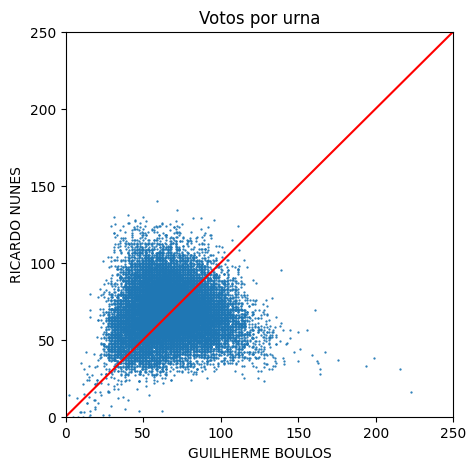

In [62]:
# grafico todas as urnas
max_vt = 250
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(df_bu_sp_pref_pvt[gb], df_bu_sp_pref_pvt[rn], 'o', ms=0.6)
#ax.plot((max_vt,0),(0,max_vt),c='grey')
ax.plot((0,max_vt),(0,max_vt),c='red')

ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(gb)
ax.set_ylabel(rn);

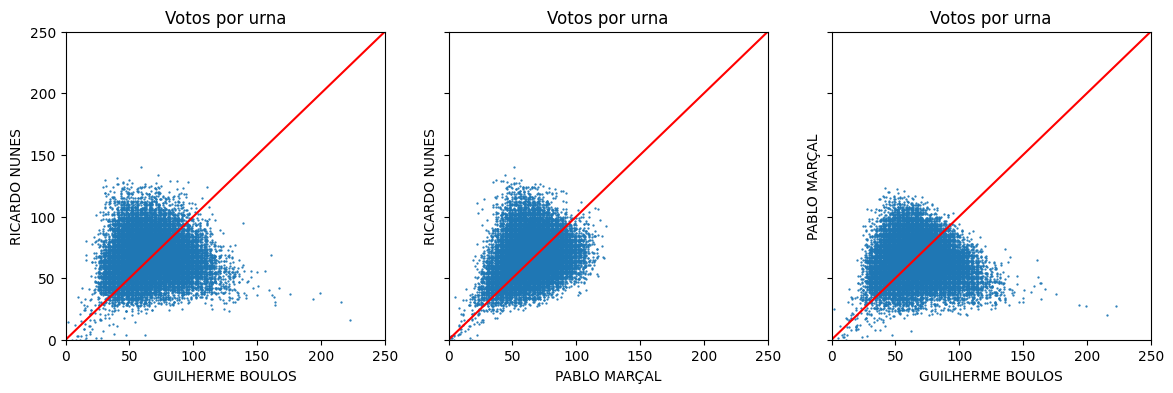

In [70]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(14,4))

max_vt = 250

ax=axs[0]
c1 = gb
c2 = rn
ax.plot(df_bu_sp_pref_pvt[c1], df_bu_sp_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);


ax=axs[1]
c1 = pm
c2 = rn
ax.plot(df_bu_sp_pref_pvt[c1], df_bu_sp_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);


ax=axs[2]
c1 = gb
c2 = pm
ax.plot(df_bu_sp_pref_pvt[c1], df_bu_sp_pref_pvt[c2], 'o', ms=0.6)
ax.plot((0,max_vt),(0,max_vt),c='red')
ax.set_title('Votos por urna')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);



In [71]:
import seaborn as sns

<Axes: xlabel='GUILHERME BOULOS', ylabel='RICARDO NUNES'>

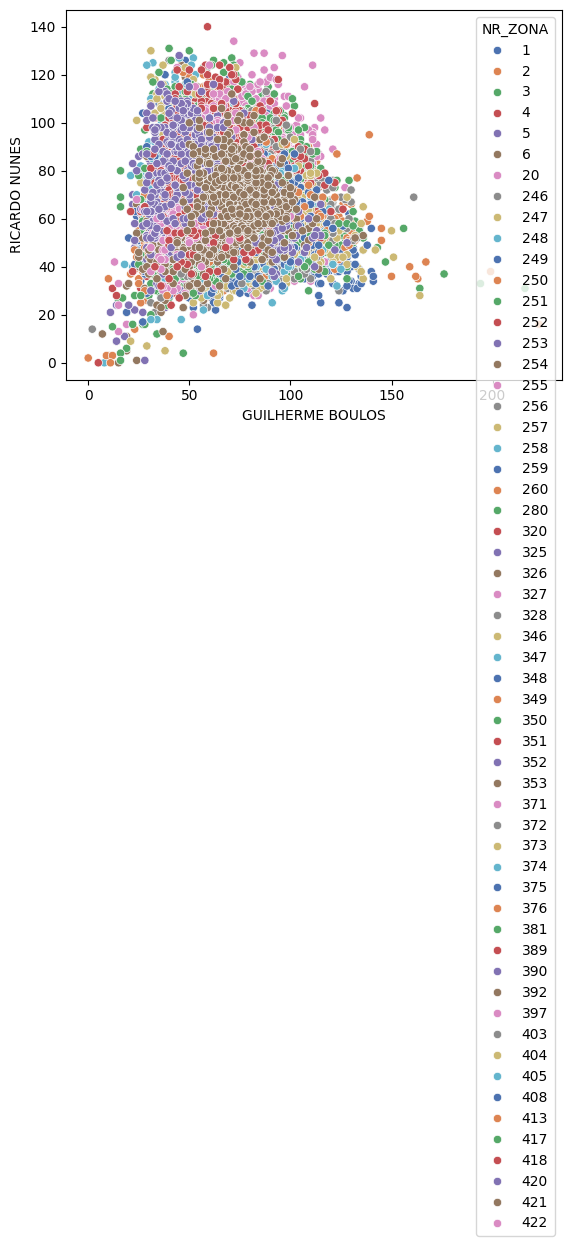

In [184]:
sns.scatterplot(x=gb, y=rn, data=df_bu_sp_pref_pvt, hue='NR_ZONA', palette='deep')

In [ ]:
from scipy.spatial import ConvexHull

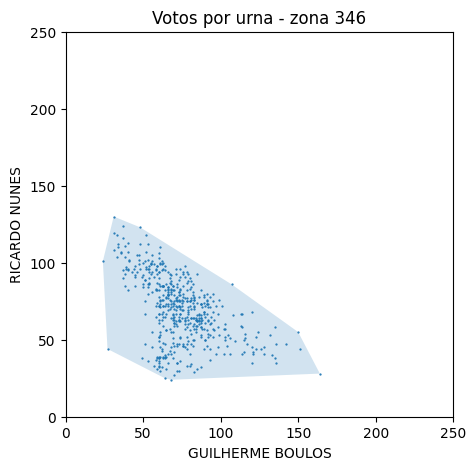

In [171]:
k = 346 # zona
c1 = gb
c2 = rn

fig, ax = plt.subplots(figsize=(5,5))

df_tmp = df_bu_sp_pref_pvt[['NR_ZONA',c1,c2]]
df_pts = df_tmp[df_tmp['NR_ZONA'] == k]
pts = df_pts[[c1,c2]]
hull = ConvexHull(pts)
plt.plot(pts[c1], pts[c2], 'o', ms=0.6)
ax.fill(pts.iloc[hull.vertices][c1], pts.iloc[hull.vertices][c2], alpha=0.2)

ax.set_title(f'Votos por urna - zona {k}')
ax.set_xlim(0,max_vt)
ax.set_ylim(0,max_vt)
ax.set_xlabel(c1)
ax.set_ylabel(c2);

In [168]:
def plt_chull_zonas (ax,c1,c2):
    for k in zonas:
        df_tmp = df_bu_sp_pref_pvt[['NR_ZONA',c1,c2]]
        df_pts = df_tmp[df_tmp['NR_ZONA'] == k]
        pts = df_pts[[c1,c2]]
        hull = ConvexHull(pts)
        #plt.plot(pts[c1], pts[c2], 'o', ms=0.6)
        ax.fill(pts.iloc[hull.vertices][c1], pts.iloc[hull.vertices][c2], alpha=0.2)
        ax.set_title('Votos por urna e zona (hull)')
        ax.set_xlim(0,max_vt)
        ax.set_ylim(0,max_vt)
        ax.set_xlabel(c1)
        ax.set_ylabel(c2);

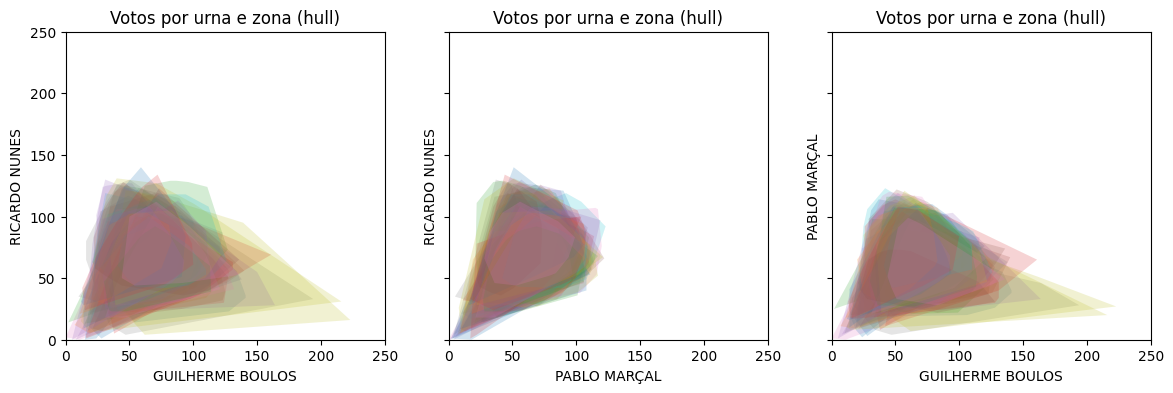

In [169]:
zonas = df_bu_sp_pref_pvt['NR_ZONA'].unique()

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(14,4))
plt_chull_zonas (ax=axs[0], c1=gb, c2=rn)
plt_chull_zonas (ax=axs[1], c1=pm, c2=rn)
plt_chull_zonas (ax=axs[2], c1=gb, c2=pm)

